In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet


%matplotlib inline

In [299]:
df = pd.read_csv('../cleaned_data.csv', index_col=0)

In [300]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,1,1,0,0,0


In [301]:
X=df.drop('cnt', axis=1)

In [302]:
y = df['cnt']

In [375]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [376]:
elasticnet = ElasticNet(l1_ratio=1)

In [377]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [378]:
score = elasticnet.score(X_test, y_test)

In [379]:
score

0.6597654247198852

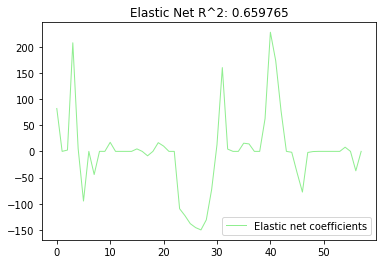

In [380]:
plt.plot(elasticnet.coef_, color='lightgreen', linewidth=1,
         label='Elastic net coefficients')
plt.legend(loc='best')
plt.title("Elastic Net R^2: %f"
          % (score))
plt.show()

In [381]:
y_pred = elasticnet.predict(X_test)

In [382]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

10875.627913334474

In [383]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

76.33539482878878

In [393]:
cv_scores = []

for n in range(1,10):
    elasticnet = linear_model.ElasticNet(l1_ratio = 1/n)
    scores = elasticnet.fit(X_train,y_train).score(X_test, y_test)
    cv_scores.append(scores.mean())

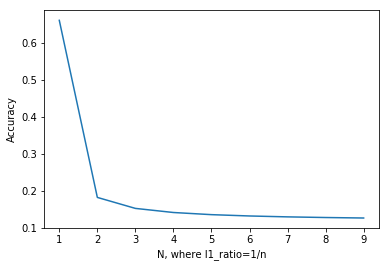

In [395]:
plt.plot(range(1,10), cv_scores)
plt.xlabel('N, where l1_ratio=1/n')
plt.ylabel('Accuracy')
plt.show()

0.1811157764252962